In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [169]:
df=pd.read_csv('AppleStore.csv')

In [170]:
df.head()

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
0,1,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,Games,38,10
1,2,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,Productivity,37,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,Weather,37,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,Shopping,37,9
4,5,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45


Text(0.5, 1.0, 'most rated apps')

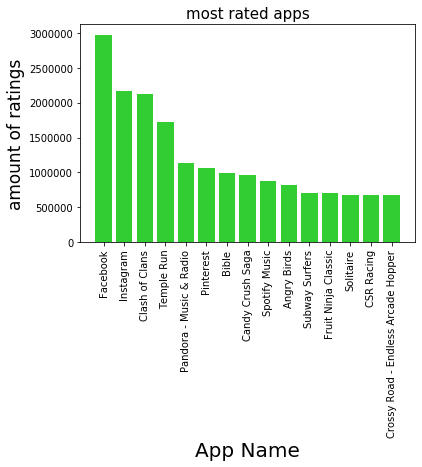

In [283]:
#15 most rated apps

df2=df.nlargest(15,'rating_count_tot')
plt.bar('track_name','rating_count_tot',data=df2,color='limegreen')
plt.xticks(df2.track_name,rotation=90)
plt.xlabel('App Name',fontsize=20)
plt.ylabel('amount of ratings',fontsize=17)
plt.title('most rated apps',fontsize=15)

Text(0.5, 1.0, 'Top Rated Apps')

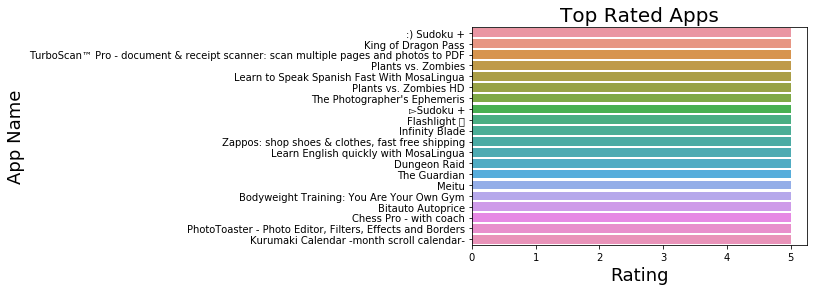

In [172]:
#20 top rated apps

df2=df.nlargest(20,'user_rating')
plot2=sns.barplot('user_rating','track_name',data=df2)
plot2.set_xlabel('Rating',fontsize=18)
plot2.set_ylabel('App Name',fontsize=18)
plot2.set_title('Top Rated Apps',fontsize=20)

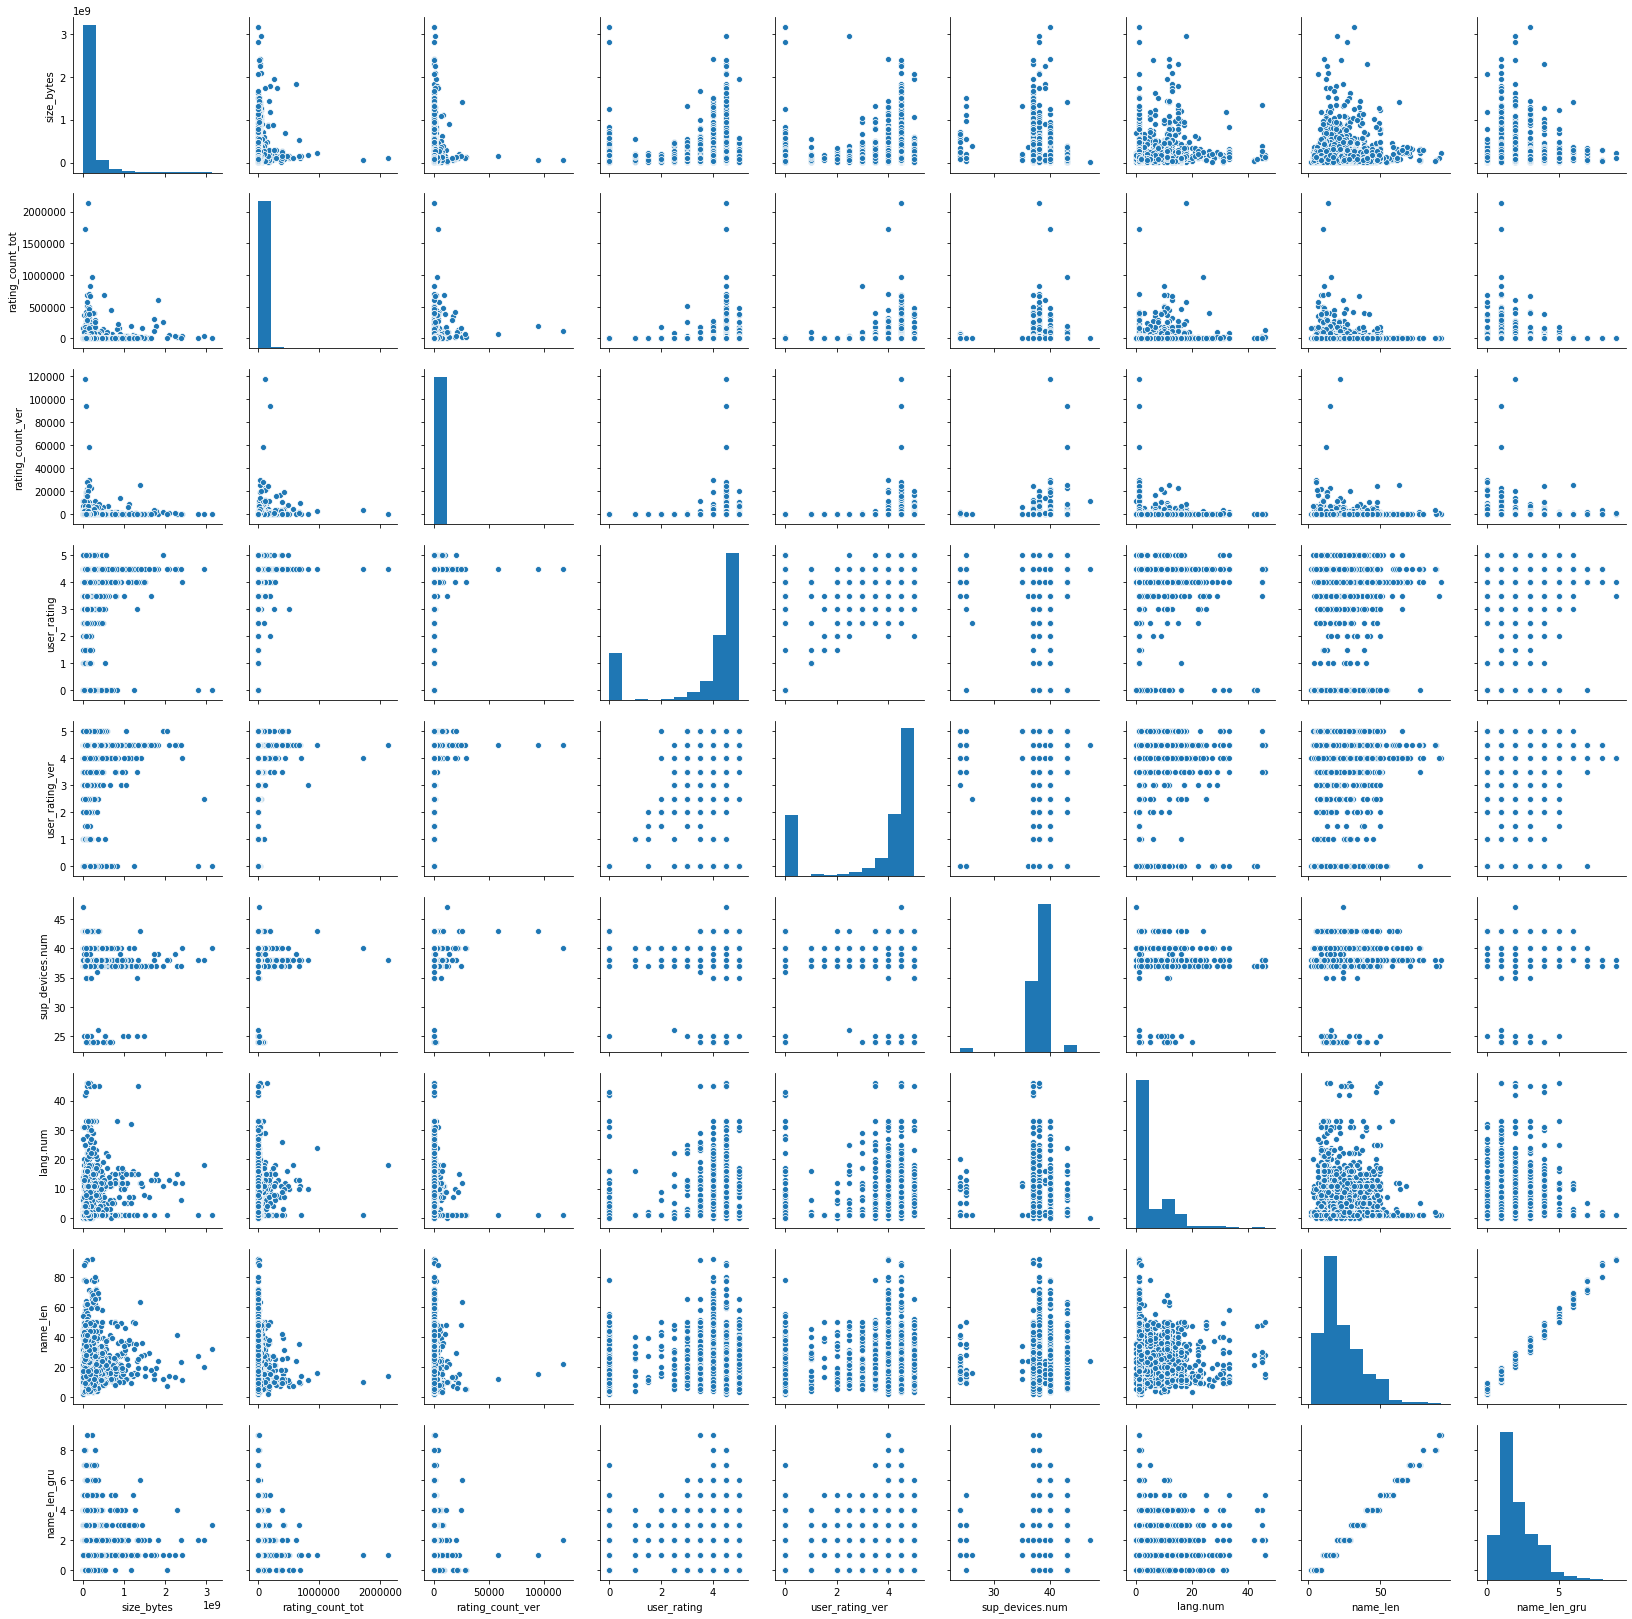

In [475]:
#free games

df2=df[df['prime_genre']=='Games']
df2=df2[df2['price']==0]
df2=df2.drop(['price','prime_genre','Unnamed: 0'],axis=1)


plot3=sns.pairplot(df2)

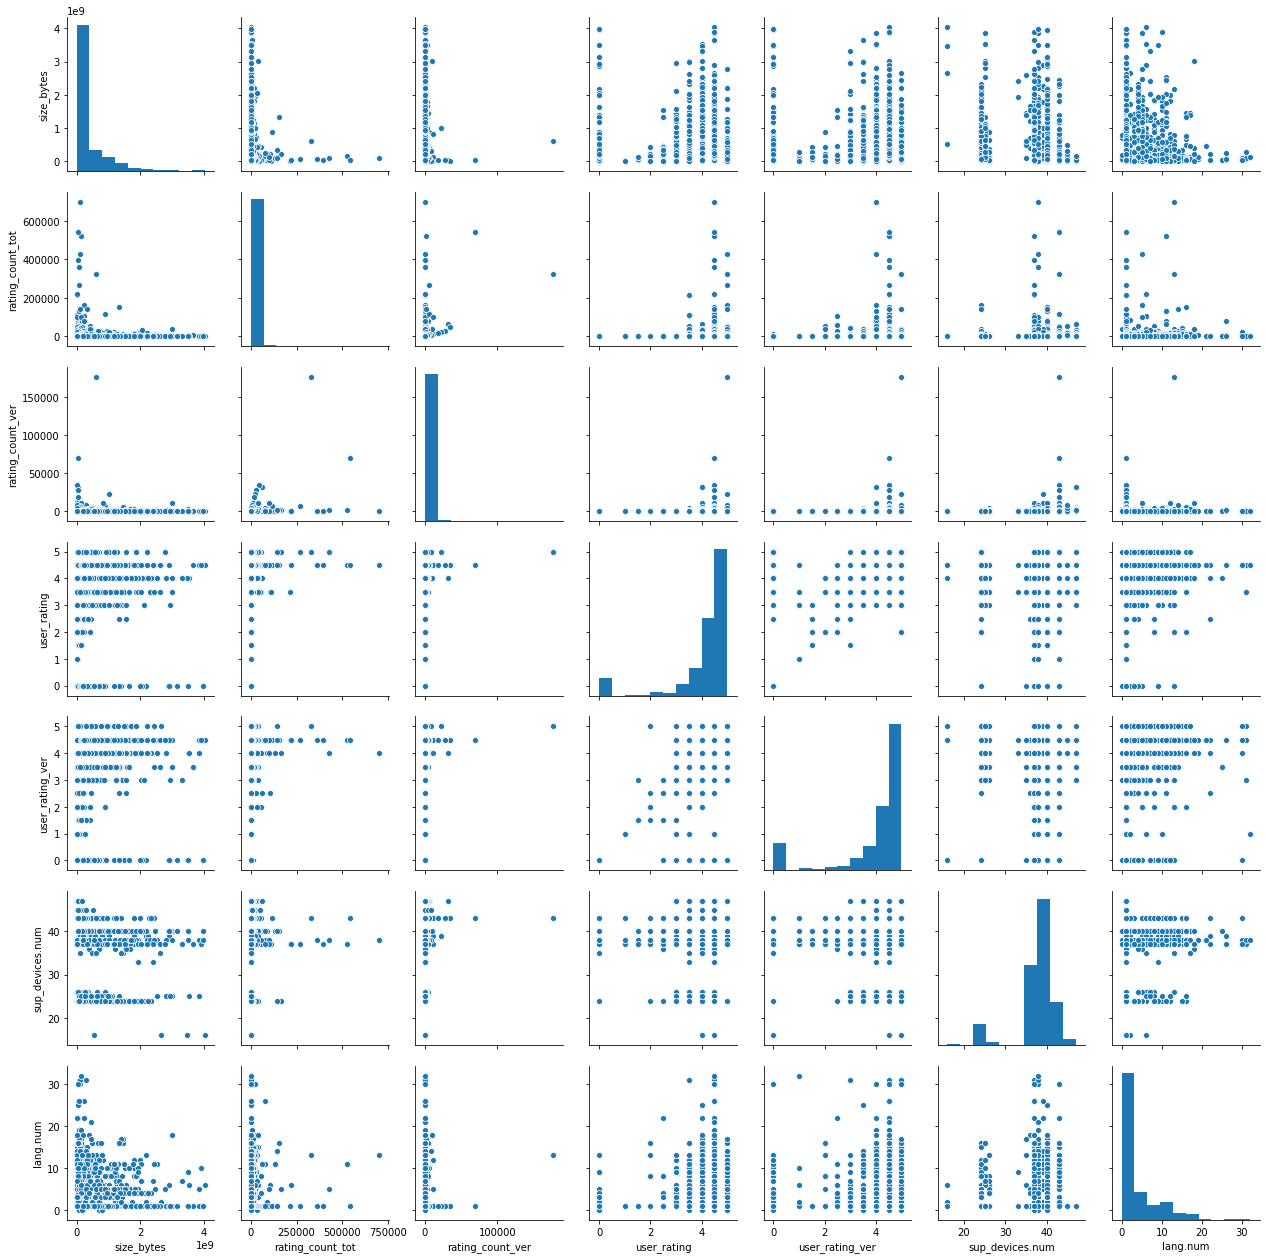

In [174]:
#paid games

df2=df[df['prime_genre']=='Games']
df2=df2[df2['price']!=0]
df2=df2.drop(['price','prime_genre','Unnamed: 0'],axis=1)


sns.pairplot(df2)

Text(0.5, 0, 'size in MB')

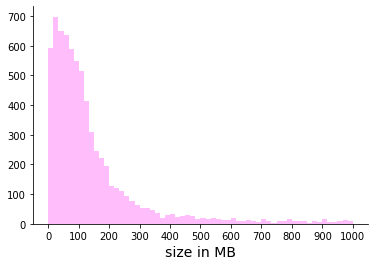

In [175]:
data=df['size_bytes']
data=data[data<10**9]

plot5=sns.distplot(data,kde=False,bins=60,color='#FF5AF5')
sns.despine(right=True)
plot5.set_xticks((np.arange(0,1001,100))*(10**6))
plot5.set_xticklabels(range(0,1001,100))
plot5.set_xlabel('size in MB',fontsize=14)

Text(32.99999999999999, 0.5, 'Catagory')

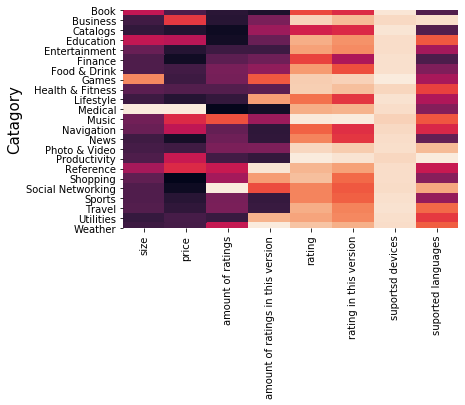

In [321]:
df2=df.drop(['Unnamed: 0','track_name','currency','ver'],axis=1)
df2=df2.groupby('prime_genre').mean()
df2['size_bytes']=df2['size_bytes']/df2['size_bytes'].max()
df2['price']=df2['price']/df2['price'].max()
df2['rating_count_tot']=df2['rating_count_tot']/df2['rating_count_tot'].max()
df2['rating_count_ver']=df2['rating_count_ver']/df2['rating_count_ver'].max()
df2['user_rating']=df2['user_rating']/df2['user_rating'].max()
df2['user_rating_ver']=df2['user_rating_ver']/df2['user_rating_ver'].max()
df2['sup_devices.num']=df2['sup_devices.num']/df2['sup_devices.num'].max()
df2['lang.num']=df2['lang.num']/df2['lang.num'].max()

plot6=sns.heatmap(df2,cbar=False,yticklabels=df2.index,xticklabels=['size','price','amount of ratings',
                                                                    'amount of ratings in this version','rating',
                                                                   'rating in this version','suportsd devices',
                                                                    'suported languages'])
plot6.set_ylabel('Catagory',fontsize=15)

Text(100, 1500000, 'have less ratings')

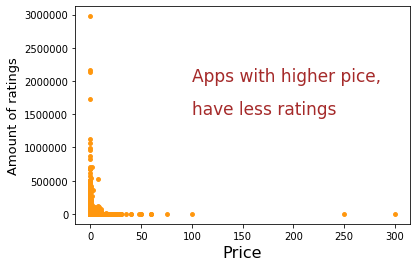

In [269]:
fig, axes =plt.subplots()
axes.scatter(df['price'],df['rating_count_tot'],color='#FF970E',s=15)
axes.set_xlabel('Price',fontsize=16)
axes.set_ylabel('Amount of ratings',fontsize=13)
axes.text(100,2000000,'Apps with higher pice,',fontsize=17,color='brown')
axes.text(100,1500000,'have less ratings',fontsize=17,color='brown')

Text(0, 0.5, 'Number of suported devices')

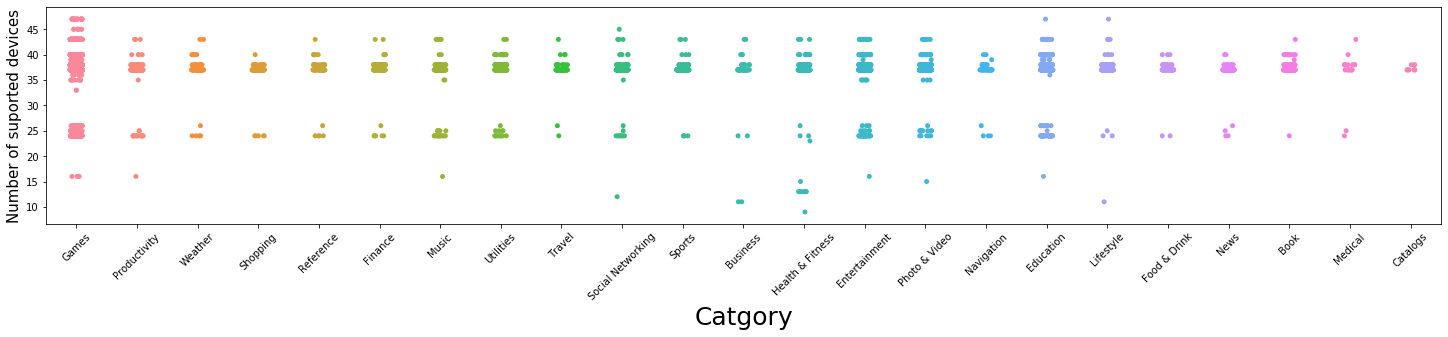

In [470]:
fig, axes=plt.subplots(figsize=(25,4))
plot8=sns.stripplot(df['prime_genre'],df['sup_devices.num'])
plot8.set_xticklabels(df['prime_genre'].unique(),rotation=45)
plot8.set_xlabel('Catgory',fontsize=25)
plot8.set_ylabel('Number of suported devices',fontsize=15)

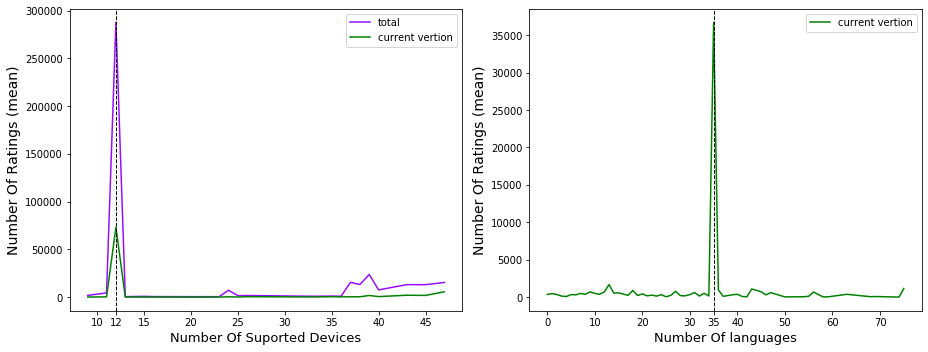

In [404]:
fig, axes=plt.subplots(1,2,figsize=(13,5))

df2=df[['sup_devices.num','rating_count_tot']].groupby('sup_devices.num').mean()
axes[0].plot(df2.index,df2['rating_count_tot'],label='total',color='#970DFF')

df2=df[['sup_devices.num','rating_count_ver']].groupby('sup_devices.num').mean()
axes[0].plot(df2.index,df2['rating_count_ver'],label='current vertion',color='green')

axes[0].legend()

axes[0].set_xlabel('Number Of Suported Devices',fontsize=13)
axes[0].set_ylabel('Number Of Ratings (mean)',fontsize=14)

axes[0].axvline(12,color='black',lw=1,ls='--')

axes[0].set_xticks([10,12,15,20,25,30,35,40,45])

df2=df[['lang.num','rating_count_ver']].groupby('lang.num').mean()
axes[1].plot(df2.index,df2['rating_count_ver'],label='current vertion',color='green')

axes[1].legend()

axes[1].set_xticks([0,10,20,30,35,40,50,60,70])

axes[1].axvline(35,color='black',lw=1,ls='--')

axes[1].set_xlabel('Number Of languages',fontsize=13)
axes[1].set_ylabel('Number Of Ratings (mean)',fontsize=14)

plt.tight_layout()

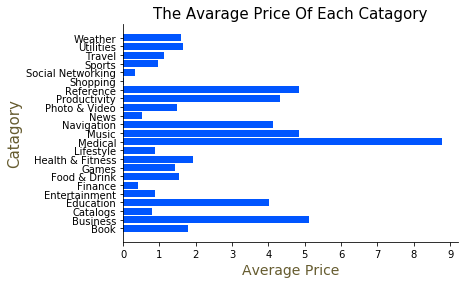

In [439]:
df2=df[['prime_genre','price']].groupby('prime_genre').mean()

fig, axes=plt.subplots()

axes.barh(df2.index,df2['price'],color='#0055FF')
axes.set_xticks(range(0,10))
axes.set_xlabel('Average Price',fontsize=14,color='#665C30')
axes.set_ylabel('Catagory',fontsize=15,color='#665C30')
axes.set_title('The Avarage Price Of Each Catagory',fontsize=15)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

Text(0, 0.5, 'Number Of Ratings')

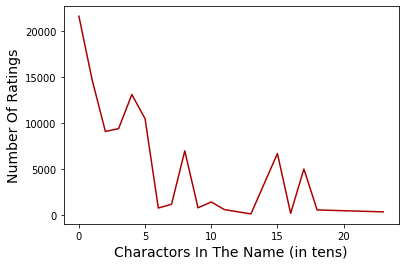

In [469]:
df2=df
df2['name_len']=df2['track_name'].apply(lambda x: len(x))
df2['name_len_gru']=df2['name_len'].apply(lambda x: x//10)

df3=df2.groupby('name_len_gru').mean()

plt.plot(df3.index,df3['rating_count_tot'],color='#AC0000')
plt.xlabel('Charactors In The Name (in tens)',fontsize=14)
plt.ylabel('Number Of Ratings',fontsize=14)